In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [46]:
df = pd.read_csv('data.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.310908,0.232050,-1.407464,-1.448084,-0.471038,1.475356,-0.718444,-0.213447,-124.619197
1,-0.817682,0.423889,-0.538574,-0.965783,0.819373,-1.133830,-0.466759,-1.482984,-13.820467
2,-1.002217,-0.415967,0.608246,-0.945746,-0.096624,-0.752435,-1.317132,0.776028,-65.524126
3,-0.215787,0.103538,-0.260036,1.431152,1.594178,-1.177761,-0.880012,0.269181,172.825010
4,0.565510,0.021272,1.702215,0.308833,1.238283,-1.760763,0.240753,2.601683,216.168666
...,...,...,...,...,...,...,...,...,...
995,0.708214,0.441941,1.410932,-1.090399,0.168655,0.233216,-0.098588,0.018850,72.183625
996,0.381353,-0.345104,-1.835769,0.044063,-1.307777,1.365526,1.388665,0.142378,98.070983
997,1.237438,-0.625677,-0.202981,-1.319247,1.096469,-0.457302,-0.800039,-0.063525,-104.904475
998,0.001205,-0.144519,-0.307962,-0.792420,-0.675178,-0.817089,-1.893615,0.213294,-114.975092


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
 3   X4      1000 non-null   float64
 4   X5      1000 non-null   float64
 5   X6      1000 non-null   float64
 6   X7      1000 non-null   float64
 7   X8      1000 non-null   float64
 8   Y       1000 non-null   float64
dtypes: float64(9)
memory usage: 78.1 KB


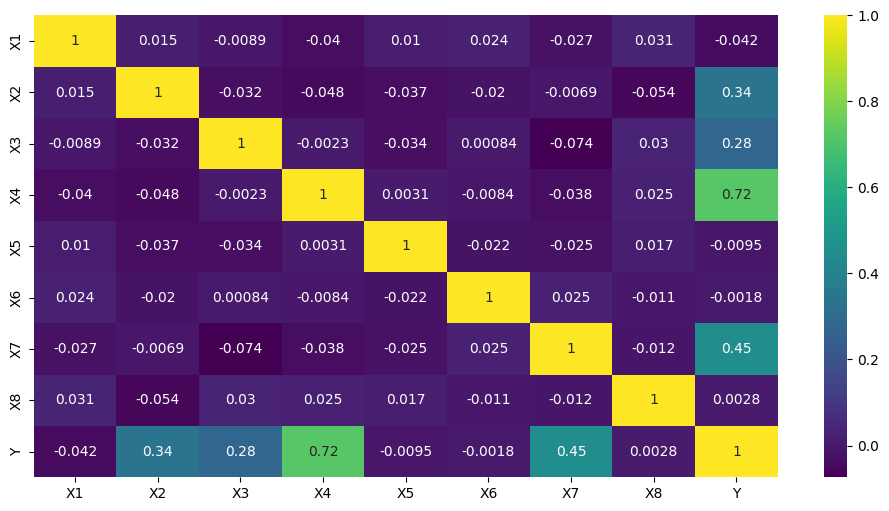

In [80]:
plt.figure(figsize=(12, 6))
sns.heatmap(round(df.corr(), 5), annot=True, cmap='viridis')
plt.show()

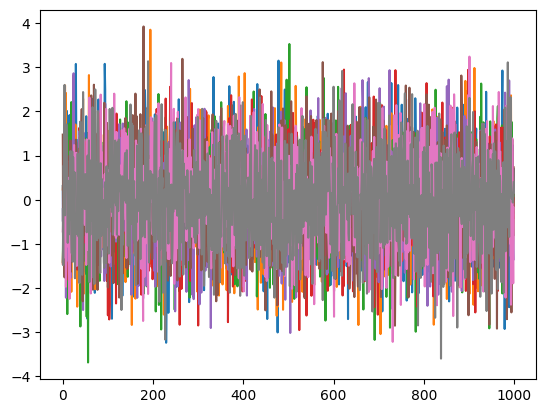

In [49]:
cols =['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
# X = df.drop('Y', axis = 1)
X = df[cols]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
# rmse(prediction, y_test)
plt.plot(X)
plt.show()

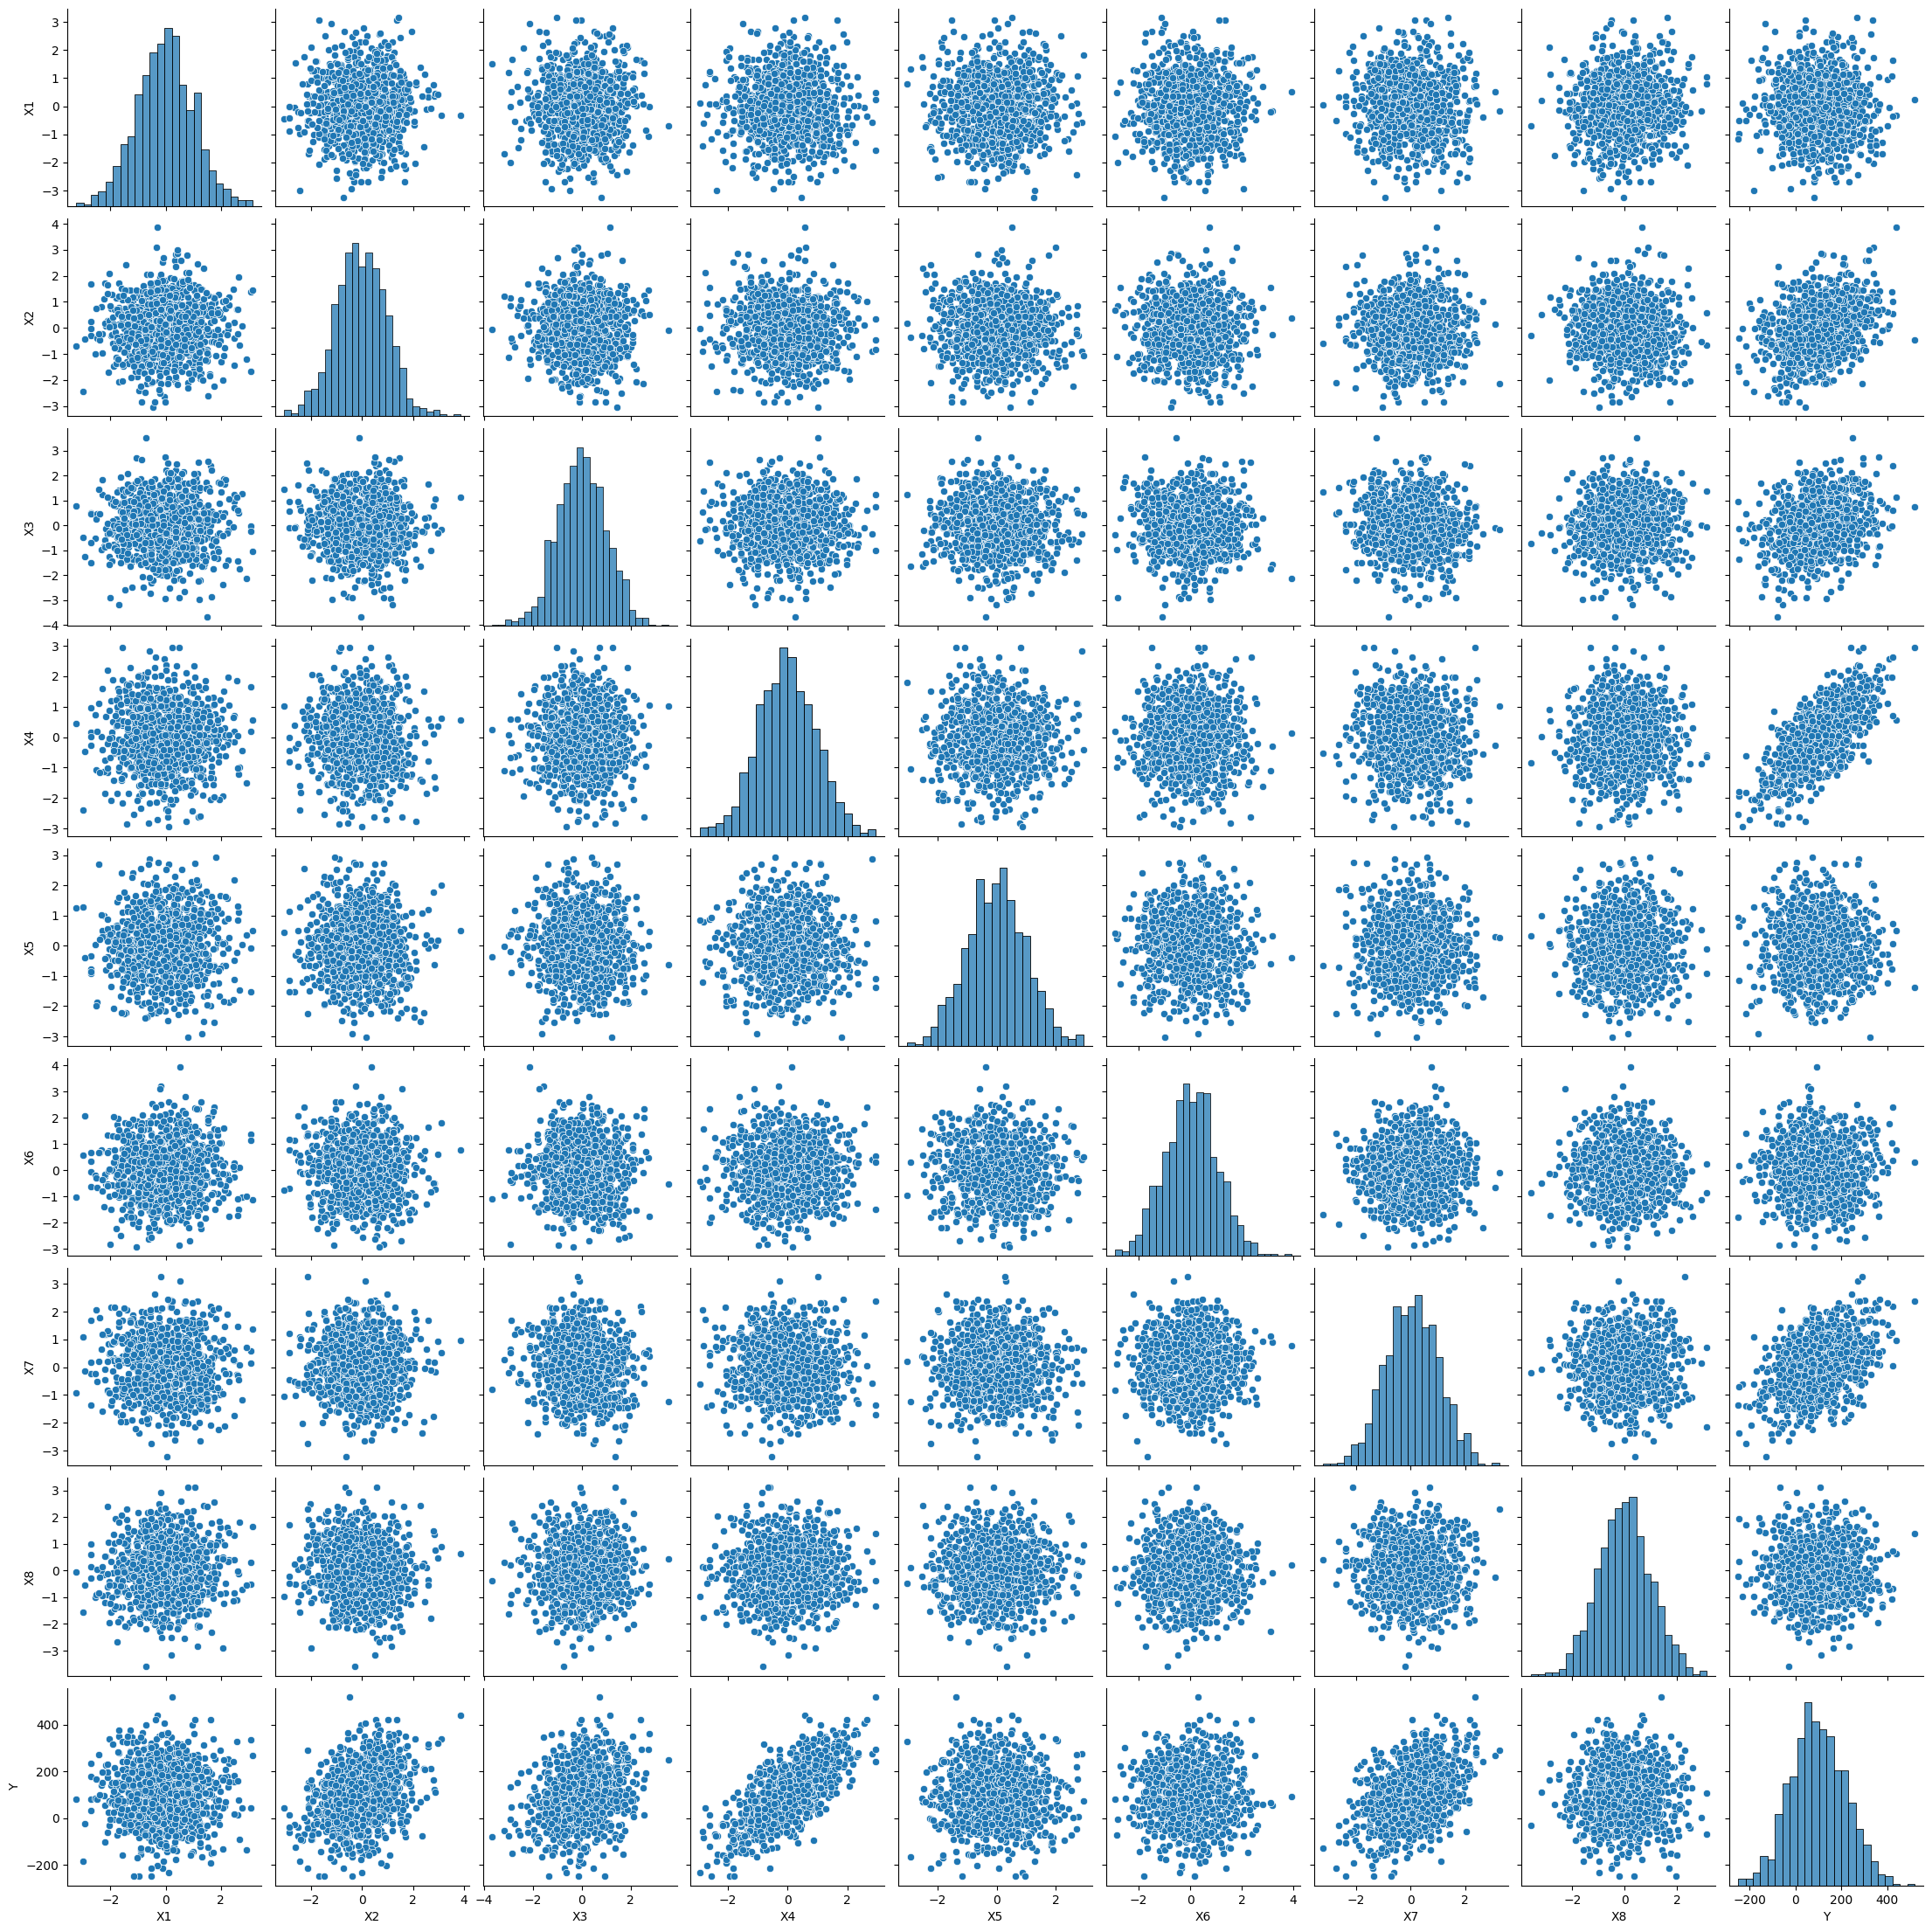

In [73]:
# sns.pairplot(df)
# plt.show()

In [51]:
kf = KFold(n_splits=5, shuffle = True, random_state=0)

cv_result = cross_val_score(model, X, y, cv = kf)
cv_result.mean()

np.float64(0.9996954090345556)

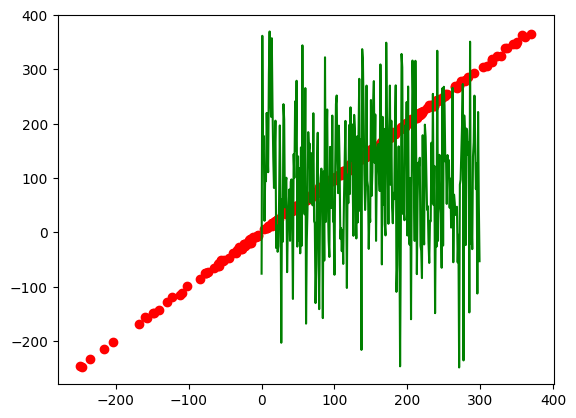

In [64]:
plt.scatter(prediction, y_test, c = 'r')
plt.plot(prediction, c = 'g')
plt.show()

In [75]:
model.coef_, model.intercept_

(array([-2.19431986e-02,  4.68994384e+01,  3.97678999e+01,  9.24413365e+01,
         3.13067145e+00,  2.01681656e-02,  6.24210187e+01,  5.04585085e-02]),
 np.float64(100.00195208855621))